# Cat Dog

- previously we use some dataset
- so it's easy because they all come in the same shape....
- today we gonna have a custom dataset from real folders....

- later on, we gonna use `torchvision.ImageFolder`
- so today, we gonna learn 
1. preprocessing
2. loading images from folders
3. using pre-trained models
   1. pre-trained models are models that people trained the model on large number of images, so we can reuse the model's trained weights - e.g., resnet

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #gives us some util functions

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Let's learn about preproessing

## Display Image
- use Pillow (PIL)
- use python `os` to walk through the url path

In [2]:
import os #mostly functions related to path and folders
from PIL import Image #Pillow is a friendly library for handling images
from IPython.display import display #to help us display image....#maybe plt.imshow

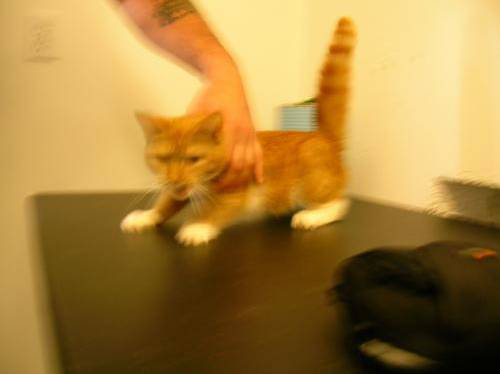

In [15]:
with Image.open('../data/cat_dog/train/cat/0.jpg') as im:
    display(im) #display is for any images....

In [11]:
#so if we want to display all images, we need to know the filename....
#so here we can use `os`
path = '../data/cat_dog/'

imagenames = []
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        imagenames.append(folder + "/" + img)

imagenames[:5]
len(imagenames)

25004

## Let's create a DataFrame to check the statistics of the size....

In [23]:
img_sizes = []
rejected_image = []

#i believe there are some invalid images......
#to fix UnidentifiedImageError, we need to use try and catch and except
for image in imagenames:
    try:
        with Image.open(image) as im:
            img_sizes.append(im.size)
    except:
        rejected_image.append(image)
        
# print(img_sizes[:5])
# print(len(rejected_image))
# print(rejected_image[:5])

In [24]:
img_sizes[0] #is a tuple, so we can create a dataframe

(364, 500)

In [26]:
df = pd.DataFrame(img_sizes, columns = ['width', 'height'])
df.head()

,width,height
0,364,500
1,484,499
2,447,500
3,500,482
4,500,374


In [30]:
#let's try to make sense what Chaky is trying to do
#later on, I have to decide which image size I will use
#i cannot simply use different sizes
#otherwise, my neural network will not work properly.....
print(df['width'].describe())
print(df['height'].describe())

count    25000.00000
mean       404.09904
std        109.03793
min         42.00000
25%        323.00000
50%        447.00000
75%        499.00000
max       1050.00000
Name: width, dtype: float64
count    25000.000000
mean       360.478080
std         97.019959
min         32.000000
25%        301.000000
50%        374.000000
75%        421.000000
max        768.000000
Name: height, dtype: float64


## Transformations

(499, 375)


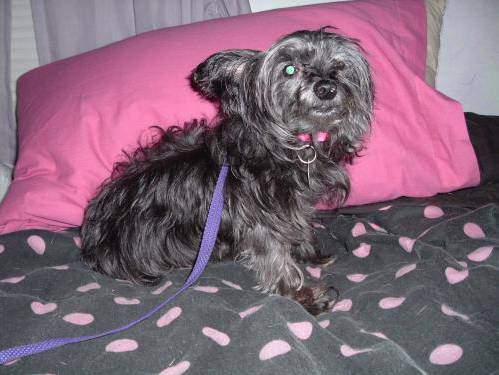

In [31]:
dog = Image.open('../data/cat_dog/train/dog/0.jpg')
print(dog.size)
display(dog)

In [32]:
#getpixel
r, g, b = dog.getpixel((0, 0))
print(r, g, b)

115 113 124


In [33]:
#let's learn about normalization
#Compose is basically allowing you to combine many transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

In [38]:
print(dog.size) #W, H

(499, 375)


In [35]:
im = transform(dog)
type(im) #so you can see now that im is now a tensor

torch.Tensor

In [37]:
print(im.shape) #C, H, W

torch.Size([3, 375, 499])
